In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Mean_Shift:
    def __init__(self, bandwith=None, bandwith_norm_step=100):
        self.bandwith = bandwith
        self.bandwith_norm_step = bandwith_norm_step

    def fit(self, data_set):
        if self.bandwith == None:
            initial_centroid = np.average(data_set, axis=0)
            initial_norm = np.linalg.norm(initial_centroid)
            self.bandwith = initial_norm/self.bandwith_norm_step

        centroids = {}
        for i in range(len(data_set)):
            centroids[i] = data_set[i]

        weights = []
        for i in range(self.bandwith_norm_step):
            weights.append(i)
        weights = weights[::-1]

        while True:
            new_centroids = []
            for i in centroids:
                in_bandwith = []
                centroid = centroids[i]
                weights_list = []
                for features in data_set:
                    dist = np.linalg.norm(features - centroid)
                    if dist == 0:
                        dist = 0.000000000001
                    weight_index = int(dist/self.bandwith)
                    if weight_index > self.bandwith_norm_step - 1:
                        weight_index = self.bandwith_norm_step - 1

                    weights_list.append(weights[weight_index])
                    in_bandwith.append(features)

                new_centroid = np.average(in_bandwith, axis=0,
                                          weights=np.array(weights_list))
                new_centroids.append(tuple(new_centroid))

            unique_centroids = sorted(list(set(new_centroids)))
            to_pop = []
            for y in unique_centroids:
                for z in unique_centroids:
                    if y == z:
                        pass
                    elif np.linalg.norm(np.array(y) - np.array(z)) <= self.bandwith:
                        if [z, y] in to_pop:
                            pass
                        else:
                            to_pop.append([y, z])
                        break

            for i in to_pop:
                try:
                    unique_centroids.remove(i[0])
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(unique_centroids)):
                centroids[i] = np.array(unique_centroids[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break

            if optimized:
                break

        self.centroids = centroids
        self.classifications = {}
        for i in range(len(self.centroids)):
            self.classifications[i] = []

        for features in data_set:
            dist = []
            for centroid in self.centroids:
                dist.append(np.linalg.norm(
                    features - self.centroids[centroid]))

            classification = dist.index(min(dist))
            self.classifications[classification].append(features)

    def predict(self, features):
        dist = []
        for centroid in self.centroids:
            dist.append(np.linalg.norm(
                features - self.centroids[centroid]))

        classification = dist.index(min(dist))
        return classification

In [3]:
data_set = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6],
                     [6, 10], [1, 1], [9, 11], [8, 2], [10, 2], [9, 3]])
test_set = [[4, 8], [10, 10], [0, 0], [8, -2]]

colors = ["g", "r", "b", "k"]

In [4]:
model = Mean_Shift()
model.fit(data_set)

In [5]:
centroids = model.centroids
print(f"Number of Clusters: {len(centroids)}")

Number of Clusters: 3


Featureset: [4, 8] | Prediction: r
Featureset: [10, 10] | Prediction: r
Featureset: [0, 0] | Prediction: g
Featureset: [8, -2] | Prediction: b


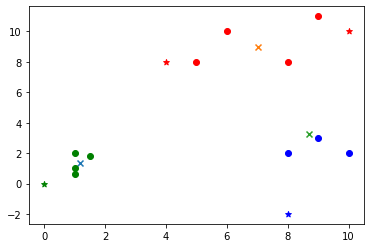

In [6]:
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], marker="x")

for classification in model.classifications:
    for features in model.classifications[classification]:
        plt.scatter(features[0], features[1], color=colors[classification])

for t in test_set:
    prediction = model.predict(t)
    plt.scatter(t[0], t[1], marker="*", color=colors[prediction])
    print(f"Featureset: {t} | Prediction: {colors[prediction]}")

plt.show()